In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import patsy 
import math

pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None) 

In [2]:
movie_ratings = pd.read_csv("/afs/crc.nd.edu/user/j/jnazario/social_sensing_boxoffice/movieRatings.txt", names = ["Movie", "RT", "IMDB", "MC"])
movie_features = pd.read_json("/afs/crc.nd.edu/user/j/jnazario/social_sensing_boxoffice/tweetsMovies.json")
movie_features = movie_features.T #transposed dataframe
movie_features = movie_features.reset_index()
movie_features.columns = ["Movie","sent","avg_rt"]

In [3]:
display(movie_features)

,Movie,sent,avg_rt
0,Master Z: Ip Man Legacy,0.285000,1.022500
1,Spider-Man: Into the Spider-Verse,0.287500,1.588333
2,Aquaman,0.114167,0.306667
3,Fantastic Beasts: The Crimes of Grindelwald,0.900833,0.460000
4,Avengers: Infinity War,0.144167,0.737500
5,Mary Poppins Returns,0.409167,0.519167
6,Green Book,-0.233333,0.632500
7,Bohemian Rhapsody,0.202500,1.029167
8,Creed II,0.165833,0.165833
9,Black Panther,-0.267500,0.457500


In [4]:
movie_ratings

,Movie,RT,IMDB,MC
0,Master Z: Ip Man Legacy,73.0,6.5,73.0
1,Spider-Man: Into the Spider-Verse,97.0,8.5,87.0
2,Aquaman,65.0,7.2,55.0
3,Fantastic Beasts: The Crimes of Grindelwald,37.0,6.7,52.0
4,Avengers: Infinity War,85.0,8.5,68.0
5,Mary Poppins Returns,79.0,7.0,66.0
6,Green Book,78.0,8.3,69.0
7,Bohemian Rhapsody,61.0,8.1,49.0
8,Creed II,84.0,7.3,66.0
9,Black Panther,97.0,7.3,88.0


In [5]:
#result = pd.concat([movie_ratings, movie_features], axis=0, sort=False)
final = movie_ratings.merge(movie_features[['Movie','sent','avg_rt']], on = ['Movie'])

In [25]:
final
final['RT'].value_counts(normalize=True)

78.0    0.142857
79.0    0.142857
85.0    0.142857
37.0    0.142857
65.0    0.142857
97.0    0.142857
73.0    0.142857
Name: RT, dtype: float64

<h1>Hard code box office revenue table</h1>

In [7]:
d = {'Movie': ['Master Z: Ip Man Legacy', 'Spider-Man: Into the Spider-Verse', 'Aquaman', 'Fantastic Beasts: The Crimes of Grindelwald', 'Avengers: Infinity War', 'Mary Poppins Returns', 'Green Book'], 'BOR': [0.09, 35.4, 67.9, 62.2, 257.7, 23.5,0.32]}
box_col = pd.DataFrame(data = d)
box_col 

,Movie,BOR
0,Master Z: Ip Man Legacy,0.09
1,Spider-Man: Into the Spider-Verse,35.40
2,Aquaman,67.90
3,Fantastic Beasts: The Crimes of Grindelwald,62.20
4,Avengers: Infinity War,257.70
5,Mary Poppins Returns,23.50
6,Green Book,0.32


In [8]:
final = final.merge(box_col[['Movie','BOR']], on = ['Movie'])

<h1>Multiple Linear Regression Model </h1>

In [21]:
formula = "BOR ~ 1 + RT + IMDB + MC + sent + avg_rt"
y, X = patsy.dmatrices(formula, final, return_type='matrix')  #remember this drops missing data for you
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    BOR   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                 -0.994
Method:                 Least Squares   F-statistic:                    0.4019
Date:                Thu, 25 Apr 2019   Prob (F-statistic):              0.824
Time:                        16:51:10   Log-Likelihood:                -37.002
No. Observations:                   7   AIC:                             86.00
Df Residuals:                       1   BIC:                             85.68
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    464.5885   1537.066      0.302      0.8

/afs/crc.nd.edu/user/j/jnazario/anaconda3/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


In [22]:
#fig = plt.figure()
#fig.set_size_inches(18.5, 5.5, forward=True)
#plt.scatter(X,y)
final = final.dropna()
final

,Movie,RT,IMDB,MC,sent,avg_rt,BOR
0,Master Z: Ip Man Legacy,73.0,6.5,73.0,0.285000,1.022500,0.09
1,Spider-Man: Into the Spider-Verse,97.0,8.5,87.0,0.287500,1.588333,35.40
2,Aquaman,65.0,7.2,55.0,0.114167,0.306667,67.90
3,Fantastic Beasts: The Crimes of Grindelwald,37.0,6.7,52.0,0.900833,0.460000,62.20
4,Avengers: Infinity War,85.0,8.5,68.0,0.144167,0.737500,257.70
5,Mary Poppins Returns,79.0,7.0,66.0,0.409167,0.519167,23.50
6,Green Book,78.0,8.3,69.0,-0.233333,0.632500,0.32


<h1>Plot data and regression model</h1>

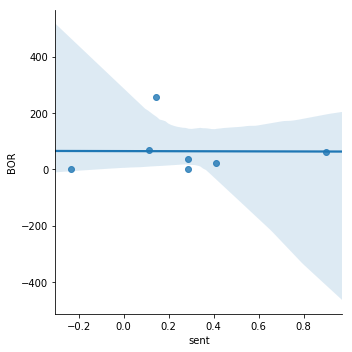

In [24]:
import seaborn as sns
# Use a Linear Model Plot
sns.lmplot(x='sent', y='BOR',data=final)

<h1>Residuals Plot</h1>

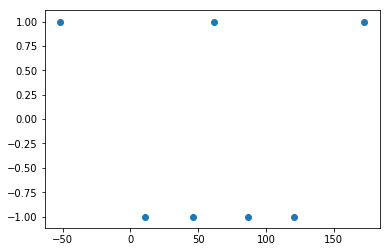

In [18]:
infl = results.get_influence() #To get the residuals
plt.scatter(results.fittedvalues,infl.resid_studentized_internal)